<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3

_By Faridoon Farahi_


## The Data Science Process

### Problem Statement

This project is aimed at predicting the subbredit categories for different comments belonging to categories of `boardgames` and `videogames`

For this project, I have used boardgames and videogames as subreddits. This is done not randomly but rather on purpose since I wanted to explore how the classificaiton algorithms will perform on similar data.

### Data Collection

In [1]:
# Import libaries here
import pandas as pd
import numpy as np
import requests
import scrapy
import time
import nltk
import string
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer, PorterStemmer
from bs4 import BeautifulSoup
from sklearn.utils import shuffle
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, recall_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
# Set params for boardgames catergory
params={'subreddit':'boardgames', 
        'size':100,
}

In [3]:
# Set the url for subreddit for boardgames catergories
url='https://api.pushshift.io/reddit/search/submission?subreddit=boardgames'
html=requests.get(url).text
res = requests.get(url, params)

In [4]:
# Create a function that will create a dataframe with each subreddit comment
def df_from_response(res):
    # initialize dataframe for batch of data in response
    df = pd.DataFrame()

    # loop through each post pulled from res and append to df
    for post in res.json()['data']:
        try :
            times = []
            times.append(post['created_utc'])
            earliest_post_time = min(times)

            df = df.append({
                'subreddit': post['subreddit'],
                'title': post['title'],
                'selftext': post['selftext']
            }, ignore_index=True)

            params['before'] = earliest_post_time
        except KeyError :
            continue

    return df

# initialize dataframe and parameters for pulling data in loop
boardgame_df = pd.DataFrame()
params = {'limit': 100}

# loop through 20 times (returning 1K posts)
for i in range(20):
    # make request`
    res = requests.get(url,params=params)

    # get dataframe from response
    new_df = df_from_response(res)
    
    # append new_df to data
    boardgame_df = boardgame_df.append(new_df, ignore_index=True)

In [5]:
# Check to see if data can be collected
res = requests.get(url=url, params=params
)
res.status_code

200

In [6]:
# REPEAT PROCESS FOR 2nd topic, i.e. videogames

# Set params for videogames catergory
params={'subreddit':'videogames', 
        'size':100,
}

In [7]:
# Set the url for subreddit for videogames catergories
url='https://api.pushshift.io/reddit/search/submission?subreddit=videogames'
html=requests.get(url).text
res = requests.get(url, params)

In [8]:
# Create a function that will create a dataframe with each subreddit comment

# initialize videogame_dfframe and parameters for pulling videogame_df in loop
videogame_df = pd.DataFrame()
params = {'limit': 100}

# loop through 50 times (returning 1K posts)
for i in range(50):
    # make request
    res = requests.get(url,params=params)

    # get videogame_dfframe from response
    new_df = df_from_response(res)
    
    # append new_df to videogame_df
    videogame_df = videogame_df.append(new_df, ignore_index=True)

In [9]:
# Check to see if data can be collected
res = requests.get(url=url, params=params
)
res.status_code

200

### Data Cleaning

In [10]:
# Create a new dataframe called boardgames.
# Clean the data to remove empty text, removed text and deleted text in selftext for boardgames comments
boardgames = boardgame_df[(boardgame_df['selftext']!="") & (boardgame_df['selftext']!="[removed]") & (boardgame_df['selftext']!="[deleted]")].iloc[:1000]

# Reset index after clearning the data 
boardgames = boardgames.reset_index(drop=True)

boardgames

,selftext,subreddit,title
0,Basically as the title suggests. Me and my fri...,boardgames,What is a good game for those who like philoso...
1,For several months our research &amp; developm...,boardgames,Drunk Donald - Make Drinking Great Again.
2,[My Shelf](https://imgur.com/a/e2s8CfN)\n\nI k...,boardgames,[COMC] Running out of space on my tiny shelf
3,Looking for another medium-light weight game f...,boardgames,Medium-light weight recommendation
4,Thou shall forgive the analysis paralysis of o...,boardgames,Board Game Commandments
...,...,...,...
995,"This may have been asked before, but does KoT:...",boardgames,King of Tokyo: Dark Edition; More Monsters?
996,The rulebook doesnt mention it.,boardgames,Unmatched: do the spaces you jump over with a ...
997,I have a choice between these two games.\n\nYe...,boardgames,Yedo or Rising Sun? Which one to choose?
998,[Their current Kickstarter for what seems like...,boardgames,Are Game Theory Tables trustworthy enough to s...


In [11]:
# Create a new dataframe called videogames.
# Clean the data to remove empty text, removed text and deleted text in selftext for videogames comments

videogames = videogame_df[(videogame_df['selftext']!="") & (videogame_df['selftext']!="[removed]") & (videogame_df['selftext']!="[deleted]")].iloc[:1000]
videogames = videogames.reset_index(drop=True)
videogames

,selftext,subreddit,title
0,&amp;#x200B;\n\nhttps://preview.redd.it/slk0k7...,videogames,Coco is great in the Crash Bandicoot N. Sane T...
1,Years ago I found a video game ( I think ghost...,videogames,What if I find a video game in a shopping cart?
2,I already have the Elgato HD60 S Plus. Looking...,videogames,Looking for a good laptop for PS4/ps5 streaming
3,Does anyone know any ps4 horror games that’ll ...,videogames,Horror Games
4,Your thoughts...?,videogames,What difference does facial expressions have o...
...,...,...,...
995,\n\nJust got a Switch. I have Mario Kart 8 Del...,videogames,What are some good Switch games that aren't th...
996,\n\n[View Poll](https://www.reddit.com/poll/kt...,videogames,Choose your favorite games (change flair if ne...
997,This might be a silly question. But I used to ...,videogames,Recommendations?
998,So I am looking for a new FPS game that looks ...,videogames,FPS game


In [12]:
# Write boardgames and videogames dataframes to csv files for EDA and modeling so that we do not get updated data each time we run notebbook.  
boardgames.to_csv('boardgames.csv',index=False)
videogames.to_csv('videogames.csv', index=False)

### Exploratory Data Analysis (EDA)

In [42]:
# Reading boardgames and videogames csv files. 
boardgames = pd.read_csv('data/boardgames.csv')
videogames = pd.read_csv('data/videogames.csv')

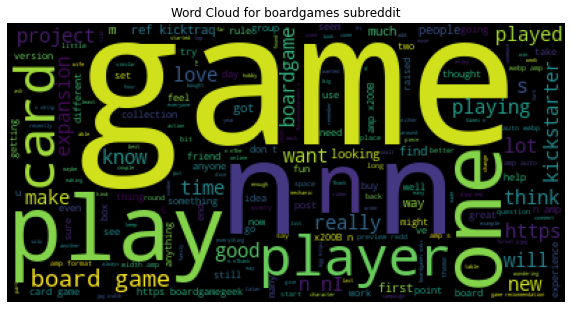

In [14]:
# Create Word Cloud for boardgames 
text = boardgames['selftext'].values 

wordcloud = WordCloud().generate(str(text))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for boardgames subreddit')
plt.show()

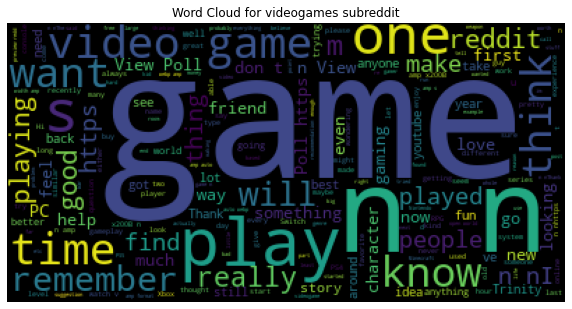

In [15]:
# Create Word Cloud for videogames 
text = videogames['selftext'].values 

wordcloud = WordCloud().generate(str(text))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for videogames subreddit')
plt.show()

In [16]:
# class label for boardgames
zeros = np.zeros(len(boardgames))

# class label for videogames
ones = np.ones(len(videogames))

# Create a new list with ones and zeros. This will be later used for building word frequecies
labels = np.append(zeros,ones)
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [17]:
# Create a function that will process the comments from the merged dataframe. This function stemms, tokenize and removes  stopwords from
# merged_df dataframe
def process_comment(comment):
    """Process comment function.
    Input:
        comment: a string containing a comment
    Output:
        comments_clean: a list of words containing the processed comment
    """

    stemmer = SnowballStemmer("english")
    stopwords_english = stopwords.words('english')
    
    # remove hyperlinks
    comment = re.sub(r'https?:\/\/.*[\r\n]*', '', comment)
    # remove hashtags
    # only removing the hash # sign from the word
    comment = re.sub(r'#', '', comment)
    # tokenize comments
    tokenizer = nltk.tokenize.WhitespaceTokenizer()
    comment_tokens = tokenizer.tokenize(comment)

    comments_clean = []
    for word in comment_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # comments_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            comments_clean.append(stem_word)

    return comments_clean

In [18]:
# Function to build the dict of words and their frequencies in merged dataframe
def build_freqs(comments, ys):
    """Build frequencies.
    Input:
        comments: a list of comments
        ys: an m x 1 array with the sentiment label of each comment
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all comments
    # and over all processed words in each comment.
    freqs = {}
    for y, comment in zip(yslist, comments):
        for word in process_comment(comment):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs


In [19]:
# create frequency dictionary
freqs = build_freqs(pd.concat([boardgames, videogames])['selftext'], labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 22579


In [20]:
display(freqs)

{('basic', 0.0): 28,
 ('titl', 0.0): 22,
 ('suggests.', 0.0): 1,
 ('me', 0.0): 7,
 ('friend', 0.0): 121,
 ('enjoy', 0.0): 120,
 ('philosophy,', 0.0): 1,
 ('pretenti', 0.0): 1,
 ('way,', 0.0): 8,
 ('find', 0.0): 184,
 ('interesting,', 0.0): 3,
 ('sometim', 0.0): 34,
 ('like', 0.0): 637,
 ('poke', 0.0): 1,
 ('fun', 0.0): 98,
 ('“deep”', 0.0): 1,
 ('questions.', 0.0): 5,
 ('what', 0.0): 139,
 ('would', 0.0): 431,
 ('good', 0.0): 190,
 ('board', 0.0): 524,
 ('game', 0.0): 2222,
 ('us?', 0.0): 3,
 ('sorri', 0.0): 20,
 ('kind', 0.0): 56,
 ('post', 0.0): 114,
 ("isn't", 0.0): 10,
 ('aloud,', 0.0): 1,
 ('pleas', 0.0): 50,
 ('remov', 0.0): 37,
 ('disregard', 0.0): 1,
 ("isn't.", 0.0): 2,
 ('for', 0.0): 90,
 ('sever', 0.0): 28,
 ('month', 0.0): 54,
 ('research', 0.0): 18,
 ('&amp;', 0.0): 41,
 ('develop', 0.0): 26,
 ('team', 0.0): 17,
 ('(basic', 0.0): 1,
 ('me)', 0.0): 3,
 ('work', 0.0): 118,
 ('(cannot', 0.0): 1,
 ('complain', 0.0): 2,
 ('most', 0.0): 35,
 ('get', 0.0): 499,
 ('hammered)', 0.0

In [21]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['video', 'board', 'play', 'reddit', 'game', 'sad', 'girlfriend', 'together', 'pretti',
        '❤', ':)', ':(', 'time', 'idea', 'power']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <videogames_count>, <boardgames_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize boardgames and videogames counts
    videogame = 0
    boardgame = 0
    
    # retrieve number of videogames counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of boardgames counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['video', 249, 68],
 ['board', 2, 524],
 ['play', 691, 960],
 ['reddit', 11, 9],
 ['game', 1502, 2222],
 ['sad', 14, 6],
 ['girlfriend', 4, 19],
 ['together', 4, 19],
 ['pretti', 69, 73],
 ['❤', 69, 73],
 [':)', 33, 28],
 [':(', 3, 1],
 ['time', 165, 252],
 ['idea', 61, 82],
 ['power', 13, 32]]

### Preprocessing and modeling

In [22]:
# Creaet class labels for boardgames and videogames. Assign class label 0 to boardgames and 1 to videogames
boardgames['class'] = 0
videogames['class'] = 1

In [23]:
# Merge boardgames and videogames dataframes to create a new dataframe
merged_df = pd.concat([boardgames, videogames])
merged_df = merged_df.reset_index(drop=True)
merged_df

,selftext,subreddit,title,class
0,Basically as the title suggests. Me and my fri...,boardgames,What is a good game for those who like philoso...,0
1,For several months our research &amp; developm...,boardgames,Drunk Donald - Make Drinking Great Again.,0
2,[My Shelf](https://imgur.com/a/e2s8CfN)\n\nI k...,boardgames,[COMC] Running out of space on my tiny shelf,0
3,Looking for another medium-light weight game f...,boardgames,Medium-light weight recommendation,0
4,Thou shall forgive the analysis paralysis of o...,boardgames,Board Game Commandments,0
...,...,...,...,...
1995,\n\nJust got a Switch. I have Mario Kart 8 Del...,videogames,What are some good Switch games that aren't th...,1
1996,\n\n[View Poll](https://www.reddit.com/poll/kt...,videogames,Choose your favorite games (change flair if ne...,1
1997,This might be a silly question. But I used to ...,videogames,Recommendations?,1
1998,So I am looking for a new FPS game that looks ...,videogames,FPS game,1


In [24]:
# download the stopwords.
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\farid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
# Initialize the tokenizer and stopwords
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
stop_words = set(stopwords.words('english')) 

# Create stemmer
stemmer = SnowballStemmer("english")

# Function to perform stemming on dataframes
def stem_text(text) :
    return [stemmer.stem(w) for w in w_tokenizer.tokenize(text)]

def remove_punctuation(text):
    text = text.translate(str.maketrans('','',string.punctuation)) 
    return text

In [26]:
X = merged_df.drop('class',axis=1)
y = merged_df['class']

In [27]:
# Removing stop words
X['selftext_without_stopwords'] = X['selftext'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Remove punctuation
X['selftext_without_stopwords'] = X['selftext_without_stopwords'].apply(remove_punctuation)

# Stem text
X['selftext_stemmed'] = X.selftext_without_stopwords.apply(stem_text)


In [28]:
# Split data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
display(X_train.head(), X_test.head())

,selftext,subreddit,title,selftext_without_stopwords,selftext_stemmed
1723,These two games remind me of each other for so...,videogames,Which game do you like more?,These two games remind reason probably graphic...,"[these, two, game, remind, reason, probabl, gr..."
263,"I recently backed the Kickstarter DEFCON 1, wh...",boardgames,DEFCON 1 at 2 players is BRILLIANT,I recently backed Kickstarter DEFCON 1 25 play...,"[i, recent, back, kickstart, defcon, 1, 25, pl..."
1569,"Guys,I joined this subreddit just to ask this ...",videogames,I don't know,GuysI joined subreddit ask question Should I t...,"[guysi, join, subreddit, ask, question, should..."
1830,My wife and I started playing video games toge...,videogames,Local co-op game suggestions for current gener...,My wife I started playing video games together...,"[my, wife, i, start, play, video, game, togeth..."
443,"I've been gaming for about ten years now, sinc...",boardgames,"[COMC] After ten years of hobby board gaming, ...",Ive gaming ten years now since husband friends...,"[ive, game, ten, year, now, sinc, husband, fri..."


,selftext,subreddit,title,selftext_without_stopwords,selftext_stemmed
1860,i was wondering if there’s any way i could do ...,videogames,is there any way i can play WWE Smackdown vs r...,wondering there’s way could this ps2 emulator ...,"[wonder, there, way, could, this, ps2, emul, t..."
353,So we're trying to decide if the contagious ca...,boardgames,Contagious,So were trying decide contagious card Organ At...,"[so, were, tri, decid, contagi, card, organ, a..."
1333,If your looking for a all platform and all gam...,videogames,Gaming Clan,If looking platform game clan discord link pos...,"[if, look, platform, game, clan, discord, link..."
905,"So I want to get into board games, but not sur...",boardgames,What are some good strategy board games?,So I want get board games sure start Im lookin...,"[so, i, want, get, board, game, sure, start, i..."
1289,Seriously I would love for this to happen. Atv...,videogames,Atv off-road fury 1 and 2 remaster?,Seriously I would love happen Atv road 2 first...,"[serious, i, would, love, happen, atv, road, 2..."


In [30]:
# Create a function to get the row from a dataframe and return it
def dummy(doc) :
    return doc

In [31]:
# Create CountVectorizer
vec = CountVectorizer(tokenizer=dummy, preprocessor=dummy, stop_words = stop_words)

# Use CountVectorizer to fit and transform both X_train and X_test dataframes
X_train_df = vec.fit_transform(X_train['selftext_stemmed']).toarray()
X_test_df = vec.transform(X_test['selftext_stemmed']).toarray()

C:\Users\farid\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


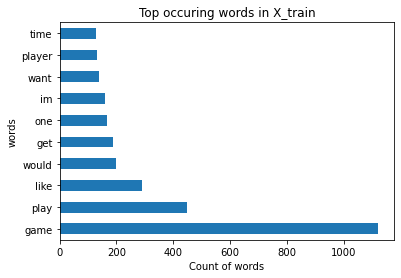

In [32]:
# convert training data to dataframe
x_train_df = pd.DataFrame(X_train_df,
                         columns=vec.get_feature_names())

# plot top occuring words
plt.title('Top occuring words in X_train')
plt.xlabel('Count of words')
plt.ylabel('words')
x_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

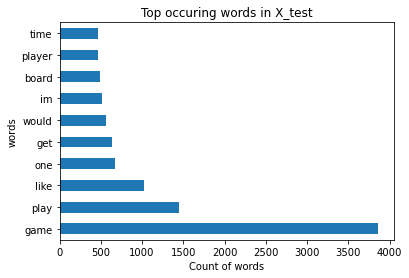

In [33]:
# convert testing data to dataframe
x_test_df = pd.DataFrame(X_test_df, 
                          columns=vec.get_feature_names())

# plot top occuring words
plt.title('Top occuring words in X_test')
plt.xlabel('Count of words')
plt.ylabel('words')
x_test_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

As we can see the word `game` occurs at most in both X_train and X_test

Bernoulli Naive Bayes 	Accuracy : 0.6946666666666667 	TPR : 0.9522510231923602 	TNR : 0.4485006518904824


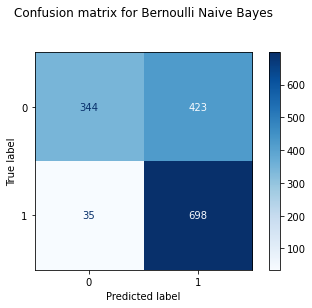




Gaussian Naive Bayes 	Accuracy : 0.7953333333333333 	TPR : 0.8294679399727148 	TNR : 0.7627118644067796


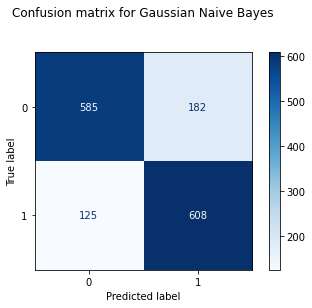




Logistic Regression 	Accuracy : 0.808 	TPR : 0.8676671214188267 	TNR : 0.7509778357235984


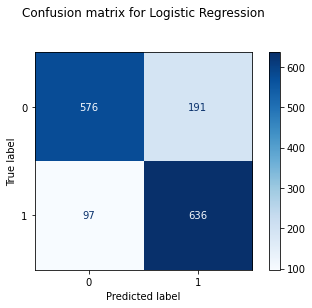




Random Forest 	Accuracy : 0.8073333333333333 	TPR : 0.8854024556616644 	TNR : 0.7327249022164276


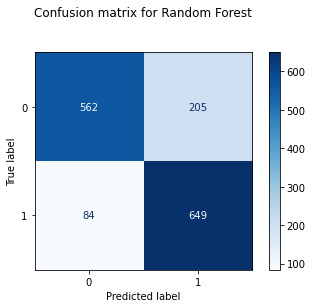




KNN 	Accuracy : 0.5986666666666667 	TPR : 0.937244201909959 	TNR : 0.27509778357235987


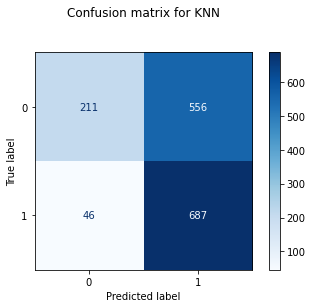




SVC 	Accuracy : 0.732 	TPR : 0.9113233287858117 	TNR : 0.560625814863103


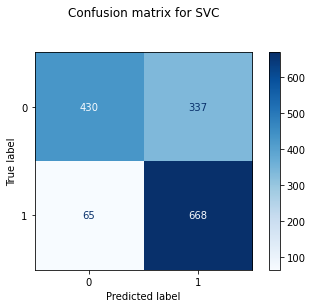




Extra Trees 	Accuracy : 0.808 	TPR : 0.8417462482946794 	TNR : 0.7757496740547588


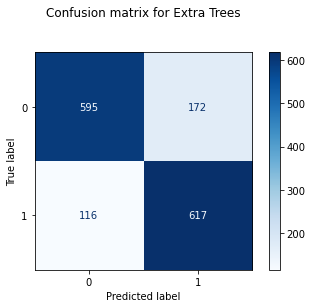

In [34]:
# Create a list of classifiers with their default parameters. This list will be used to fit the models using for loop
classifiers = [BernoulliNB(), GaussianNB(), LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), ExtraTreesClassifier()]
# Create a list of names of classifiers created above. This will be used to print their respective accuracies
classifier_names = ['Bernoulli Naive Bayes','Gaussian Naive Bayes', 'Logistic Regression', 'Random Forest', 'KNN', 'SVC', 'Extra Trees']

# Use a for loop to iterate over the classifiers and classifiers_names lists to create and fit the models
for classifier, classifier_name in zip(classifiers, classifier_names) :
    # Create the model
    clf = classifier
    
    # Fit the model
    clf.fit(X_train_df, y_train)
    
    # Get predictions
    y_pred = clf.predict(X_test_df)
    
    # Calculate the accuracy and recall of the model
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Calculate tn, fp, fn, tp for the model
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    spec = tn / (tn + fp)
    
    
    print(classifier_name, '\tAccuracy :',acc, '\tTPR :', recall, '\tTNR :', spec)
    
    # Plot the confusion matrix for the model
    plot_confusion_matrix(clf, X_test_df, y_test, cmap='Blues', values_format='d');
    plt.title('Confusion matrix for ' + classifier_name + '\n\n')
    plt.show()
    print('\n\n')

#### Repeat with TfidfVectorizer

In [35]:
# Create CountVectorizer
vec = TfidfVectorizer(tokenizer=dummy, preprocessor=dummy, stop_words = stop_words)

# Use CountVectorizer to fit and transform both X_train and X_test dataframes
X_train_df = vec.fit_transform(X_train['selftext_stemmed']).toarray()
X_test_df = vec.transform(X_test['selftext_stemmed']).toarray()

C:\Users\farid\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Bernoulli Naive Bayes 	Accuracy : 0.6946666666666667 	TPR : 0.9522510231923602 	TNR : 0.4485006518904824


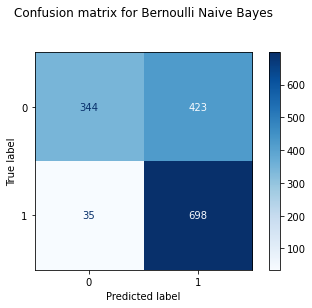



Gaussian Naive Bayes 	Accuracy : 0.778 	TPR : 0.7694406548431105 	TNR : 0.7861799217731421


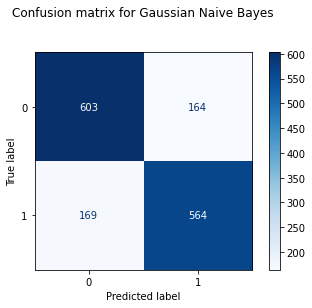



Logistic Regression 	Accuracy : 0.8426666666666667 	TPR : 0.9208731241473397 	TNR : 0.7679269882659713


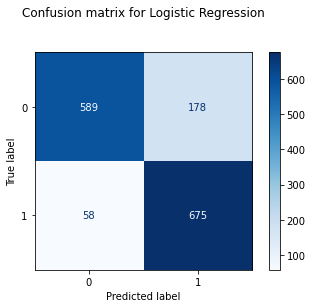



Random Forest 	Accuracy : 0.81 	TPR : 0.8935879945429741 	TNR : 0.7301173402868318


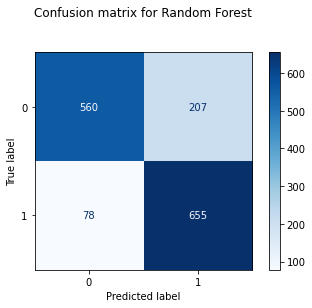



KNN 	Accuracy : 0.788 	TPR : 0.7980900409276944 	TNR : 0.7783572359843546


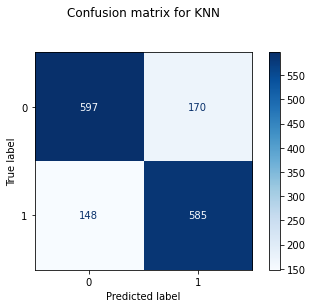



SVC 	Accuracy : 0.8373333333333334 	TPR : 0.9181446111869032 	TNR : 0.7601043024771839


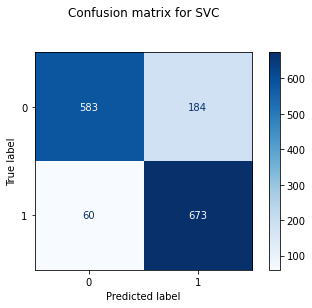



Extra Trees 	Accuracy : 0.8286666666666667 	TPR : 0.8799454297407913 	TNR : 0.7796610169491526


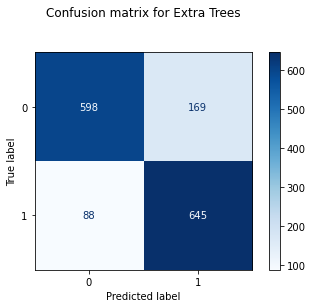

In [36]:
# Create a list of classifiers with their default parameters. This list will be used to fit the models using for loop
classifiers = [BernoulliNB(), GaussianNB(), LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), ExtraTreesClassifier()]

# Create a list of names of classifiers created above. This will be used to print their respective accuracies
classifier_names = ['Bernoulli Naive Bayes','Gaussian Naive Bayes', 'Logistic Regression', 'Random Forest', 'KNN', 'SVC', 'Extra Trees']

# Use a for loop to iterate over the classifiers and classifiers_names lists to create and fit the models
for classifier, classifier_name in zip(classifiers, classifier_names) :
    # Create the model
    clf = classifier
    
    # Fit the model
    clf.fit(X_train_df, y_train)
    
    # Get predictions
    y_pred = clf.predict(X_test_df)
    
    # Calculate the accuracy and recall of the model
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Calculate tn, fp, fn, tp for the model
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    spec = tn / (tn + fp)
    
    
    print(classifier_name, '\tAccuracy :',acc, '\tTPR :', recall, '\tTNR :', spec)
    
    # Plot the confusion matrix for the model
    plot_confusion_matrix(clf, X_test_df, y_test, cmap='Blues', values_format='d');
    plt.title('Confusion matrix for ' + classifier_name + '\n\n')
    plt.show()
    print('\n================================================================================\n')

### Analysis

Different machine learning algorithms are used to classify comments from boardgames and videogames subreddits to their respective subreddit categories. A comparative analysis for these algorithms is done to find the best performing algorithm for classification of subreddit comments belonging to different categories (i.e. subreddits).

For this project, we use `boardgames` and `videogames` as subreddits. This is done not randomly but rather on purpose since we wanted to explore how the classificaiton algorithms will perform on similar data. The world clouds generated in EDA show that there are not only a lot of similar words, but there is an intersection most frequent words for `boardgames` and `videogames`. The project is based on the hypothesis that if classification algorithms can perform well on subreddits with similar topics, then they should perform better on different topics.

Two different methods are used vectorization namely *CountVectorizer* and *TfidfVectorizer*. A comparison is done on the results of 7 different algorithms using *CountVectorizer* and *TfidfVectorizer*. Accuracy is used as the metric for evaluation of the classification algorithms. No hyperparameter tuning is done.

When using *CountVectorizer*, Logistic Regression performed the best with an accuracy of 84%. With Random Forest an accuracy of 81% is achieved which is marginally worse than the accuracy of 83.7% of Support Vector Machine and marginally worse than the accuracy of 83.8% for Extra Trees Classifier. On the other hand, KNN and BernoulliNB performed the worst.

Using *TfidfVectorizer* seemed to have improved the results overall, with a few classifiers performing marginally worse. Logistic Regression performed the best with an accuracy of 84.2%. With Random Forest an accuracy of 81% is achieved which is slightly worse than the accuracy of 83.7% of Support Vector Machine and very marginally worse than the accuracy of 82.8% for Extra Trees Classifier. The accuracy of BernoulliNB, KNN, and Gaussian  did not improve.

Confusion matrix is also used for analysis. This helps us in not only seeing if our classifier is learning, but also helps us with our TN, FP, FN and TP counts which helps us better understand how the classifier is performing. For the purposes of confusion matrix readability, note that label 0 denotes `boardgames` and label 1 denotes `videogames`. 

Looking at the confusion matrix for Logistic Regression and Random Forest while using CountVectorizer, Logistic regression had a True Positive Rate (TPR) of 95% and a True Negative Rate (TNR) of 76%. Random Forest on the other hand had had a True Positive Rate (TPR) of 90% and a True Negative Rate (TNR) of 72.4%. This means that 95% of the times, Logistic Regression was able to correctly classify comment as belonging to `boardgames` and 76% was able to correctly classify comment belonging to `videogames` whereas 90% of the times, Random Forest was able to correctly classify comment as belonging to `boardgames` and 72.4% was able to correctly classify comment belonging to `videogames`

Looking at the confusion matrix for Logistic Regression and Random Forest while using TfidfVectorizer, Logistic regression had a True Positive Rate (TPR) of 92% and a True Negative Rate (TNR) of 76%. Random Forest on the other hand had had a True Positive Rate (TPR) of 89.2% and a True Negative Rate (TNR) of 73%. This means that 92% of the times, Logistic Regression was able to correctly classify comment as belonging to `boardgames` and 76% was able to correctly classify comment belonging to `videogames` whereas 89.2% of the times, Random Forest was able to correctly classify comment as belonging to `boardgames` and 73% was able to correctly classify comment belonging to `videogames` 

I would recommend using Logistic Regression for classification of subreddit comment data, espically for `boardgames` and `videogames` subreddits. Since Logistic Regression was able to perform the best on similar subreddits, it may perform well on other subreddits as well.